# Importation et préparation des données

In [1]:
#changement de dossier
import os
os.chdir("C:/Users/ricco/Desktop/demo")

#chargement des données
import pandas
body = pandas.read_excel("body_dataset.xlsx")
body.head()

,epaule,mollet,nombril,hanche,poignet,cuisse,taille,biceps,avantbras,genou,poitrine,cheville,poids
0,106.2,36.5,74.5,93.5,16.5,51.5,71.5,32.5,26.0,34.5,89.5,23.5,65.6
1,110.5,37.5,86.5,94.8,17.0,51.5,79.0,34.4,28.0,36.5,97.0,24.5,71.8
2,115.1,37.3,82.9,95.0,16.9,57.3,83.2,33.4,28.8,37.0,97.5,21.9,80.7
3,104.5,34.8,78.8,94.0,16.6,53.0,77.8,31.0,26.2,37.0,97.0,23.0,72.6
4,107.5,38.6,82.5,98.5,18.0,55.4,80.0,32.0,28.4,37.7,97.5,24.4,78.8


In [2]:
#informations
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   epaule     247 non-null    float64
 1   mollet     247 non-null    float64
 2   nombril    247 non-null    float64
 3   hanche     247 non-null    float64
 4   poignet    247 non-null    float64
 5   cuisse     247 non-null    float64
 6   taille     247 non-null    float64
 7   biceps     247 non-null    float64
 8   avantbras  247 non-null    float64
 9   genou      247 non-null    float64
 10  poitrine   247 non-null    float64
 11  cheville   247 non-null    float64
 12  poids      247 non-null    float64
dtypes: float64(13)
memory usage: 25.2 KB


In [3]:
#isoler les variables actives
X = body[body.columns[:-1]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   epaule     247 non-null    float64
 1   mollet     247 non-null    float64
 2   nombril    247 non-null    float64
 3   hanche     247 non-null    float64
 4   poignet    247 non-null    float64
 5   cuisse     247 non-null    float64
 6   taille     247 non-null    float64
 7   biceps     247 non-null    float64
 8   avantbras  247 non-null    float64
 9   genou      247 non-null    float64
 10  poitrine   247 non-null    float64
 11  cheville   247 non-null    float64
dtypes: float64(12)
memory usage: 23.3 KB


# Etude des corrélations

In [4]:
#matrice des corrélations
R = X.corr(method='pearson')
print(R)

             epaule    mollet   nombril    hanche   poignet    cuisse  \
epaule     1.000000  0.494117  0.539114  0.651732  0.540574  0.605541   
mollet     0.494117  1.000000  0.462876  0.653984  0.539331  0.704813   
nombril    0.539114  0.462876  1.000000  0.809408  0.389133  0.545436   
hanche     0.651732  0.653984  0.809408  1.000000  0.450488  0.791178   
poignet    0.540574  0.539331  0.389133  0.450488  1.000000  0.382383   
cuisse     0.605541  0.704813  0.545436  0.791178  0.382383  1.000000   
taille     0.580925  0.516517  0.882046  0.799678  0.368840  0.559760   
biceps     0.763753  0.474796  0.474680  0.571688  0.610847  0.662411   
avantbras  0.703348  0.553761  0.426224  0.537749  0.708397  0.610940   
genou      0.500091  0.726554  0.555398  0.704407  0.496893  0.664367   
poitrine   0.834906  0.475265  0.684859  0.682284  0.546481  0.601755   
cheville   0.470181  0.695230  0.514881  0.586765  0.628608  0.520012   

             taille    biceps  avantbras     genou

In [5]:
#type de l'objet
print(type(R))

<class 'pandas.core.frame.DataFrame'>


In [6]:
#corrélation minimale par variable
print(R.min(axis=1))

epaule       0.470181
mollet       0.462876
nombril      0.389133
hanche       0.450488
poignet      0.368840
cuisse       0.382383
taille       0.368840
biceps       0.427575
avantbras    0.420604
genou        0.428614
poitrine     0.471194
cheville     0.427575
dtype: float64


In [7]:
#variable la moins corrélée par variable
R.idxmin(axis=1)

epaule       cheville
mollet        nombril
nombril       poignet
hanche        poignet
poignet        taille
cuisse        poignet
taille        poignet
biceps       cheville
avantbras      taille
genou          biceps
poitrine     cheville
cheville       biceps
dtype: object

<AxesSubplot: >

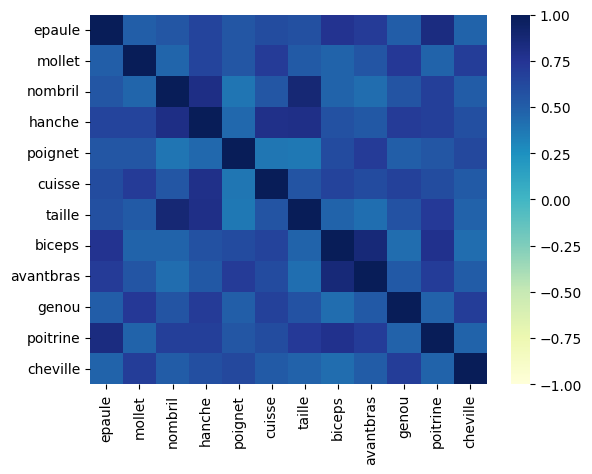

In [8]:
#heatmap
import seaborn as sns
sns.heatmap(R,vmin=-1,vmax=+1,cmap="YlGnBu")

# CAH des variables

In [9]:
#matrice de distance
import numpy
D = numpy.sqrt(1-R**2)
print(D)

             epaule    mollet   nombril    hanche   poignet    cuisse  \
epaule     0.000000  0.869395  0.842233  0.758449  0.841296  0.795814   
mollet     0.869395  0.000000  0.886423  0.756508  0.842094  0.709393   
nombril    0.842233  0.886423  0.000000  0.587247  0.921182  0.838153   
hanche     0.758449  0.756508  0.587247  0.000000  0.892783  0.611586   
poignet    0.841296  0.842094  0.921182  0.892783  0.000000  0.924004   
cuisse     0.795814  0.709393  0.838153  0.611586  0.924004  0.000000   
taille     0.813957  0.856277  0.471163  0.600429  0.929493  0.828654   
biceps     0.645509  0.880096  0.880158  0.820471  0.791749  0.749141   
avantbras  0.710846  0.832676  0.904618  0.843105  0.705814  0.791677   
genou      0.865973  0.687110  0.831584  0.709796  0.867812  0.747406   
poitrine   0.550393  0.879843  0.728675  0.731087  0.837471  0.798681   
cheville   0.882570  0.718787  0.857262  0.809757  0.777722  0.854159   

             taille    biceps  avantbras     genou

In [10]:
#numpy
import numpy

#vérification symétrique - écart avec la transposée
print(numpy.sum((D.values - numpy.transpose(D.values))**2))

0.0


In [11]:
#diaginale nulle -- somme des carrés
print(numpy.sum(numpy.diag(D.values)**2))

0.0


In [12]:
#vectoriser la matrice de distance
from scipy.spatial.distance import squareform
VD = squareform(D)
print(VD)

[0.86939546 0.84223254 0.75844899 0.84129632 0.79581377 0.81395698
 0.64550874 0.71084615 0.86597269 0.55039306 0.88257    0.88642293
 0.75650797 0.84209376 0.7093934  0.8562771  0.88009605 0.83267579
 0.68710985 0.87984252 0.71878713 0.58724662 0.92118162 0.83815277
 0.47116253 0.88015824 0.90461781 0.8315844  0.72867541 0.85726189
 0.89278266 0.6115859  0.60042926 0.82047122 0.84310487 0.70979591
 0.73108706 0.80975736 0.92400411 0.92949304 0.79174859 0.70581446
 0.86781174 0.8374714  0.77772236 0.82865447 0.74914086 0.79167708
 0.74740634 0.79868102 0.8541592  0.88229734 0.90724427 0.82255133
 0.70074905 0.87860435 0.50235643 0.90348759 0.62871738 0.90398008
 0.84929745 0.71306635 0.85854088 0.87667727 0.72466571 0.88202951]


In [13]:
#CAH - Ward
from scipy.cluster.hierarchy import ward
cah = ward(VD)
print(cah)

[[ 2.          6.          0.47116253  2.        ]
 [ 7.          8.          0.50235643  2.        ]
 [ 0.         10.          0.55039306  2.        ]
 [ 3.          5.          0.6115859   2.        ]
 [ 1.          9.          0.68710985  2.        ]
 [11.         16.          0.73290989  3.        ]
 [13.         14.          0.79700641  4.        ]
 [12.         15.          0.86559538  4.        ]
 [ 4.         18.          0.88066358  5.        ]
 [17.         19.          1.05298266  7.        ]
 [20.         21.          1.26473418 12.        ]]


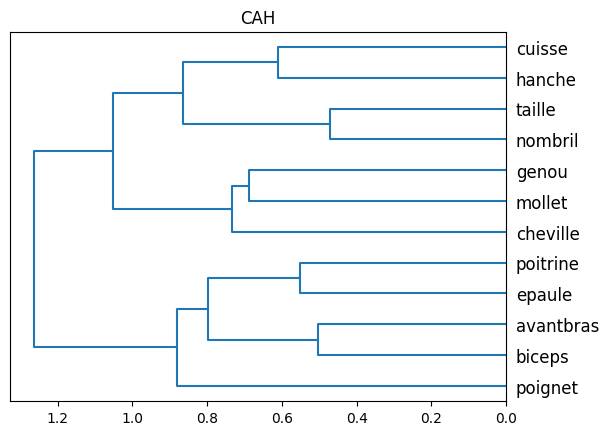

In [14]:
#dendrogramme
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
plt.title("CAH")
dendrogram(cah,labels=X.columns,orientation='left',color_threshold=0)
plt.show()

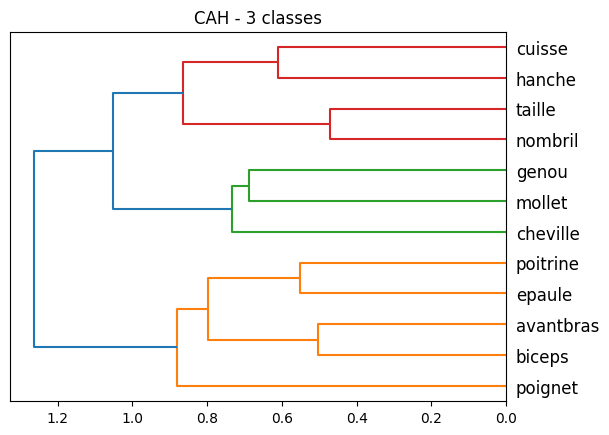

In [15]:
#matérialisation de 3 classes
plt.title("CAH - 3 classes")
dendrogram(cah,labels=X.columns,orientation='left',color_threshold=1.0)
plt.show()

In [16]:
#découpage effectif en 3 classes
from scipy.cluster.hierarchy import fcluster
groupes = fcluster(cah,t=1.0,criterion='distance')
print(groupes)

[1 2 3 3 1 3 3 1 1 2 1 2]


In [17]:
#liste des colonnes
print(X.columns)

Index(['epaule', 'mollet', 'nombril', 'hanche', 'poignet', 'cuisse', 'taille',
       'biceps', 'avantbras', 'genou', 'poitrine', 'cheville'],
      dtype='object')


In [18]:
#effectifs par groupe
nk = numpy.unique(groupes,return_counts=True)
print(nk)

(array([1, 2, 3], dtype=int32), array([5, 3, 4], dtype=int64))


In [19]:
#réorganisation de la base pour matrice des corrélations
XSorted = pandas.DataFrame(index=X.index)
for g in range(1,4):
    XSorted = pandas.concat([XSorted,X[X.columns[groupes==g]]],axis=1)
XSorted.head()

,epaule,poignet,biceps,avantbras,poitrine,mollet,genou,cheville,nombril,hanche,cuisse,taille
0,106.2,16.5,32.5,26.0,89.5,36.5,34.5,23.5,74.5,93.5,51.5,71.5
1,110.5,17.0,34.4,28.0,97.0,37.5,36.5,24.5,86.5,94.8,51.5,79.0
2,115.1,16.9,33.4,28.8,97.5,37.3,37.0,21.9,82.9,95.0,57.3,83.2
3,104.5,16.6,31.0,26.2,97.0,34.8,37.0,23.0,78.8,94.0,53.0,77.8
4,107.5,18.0,32.0,28.4,97.5,38.6,37.7,24.4,82.5,98.5,55.4,80.0


<AxesSubplot: >

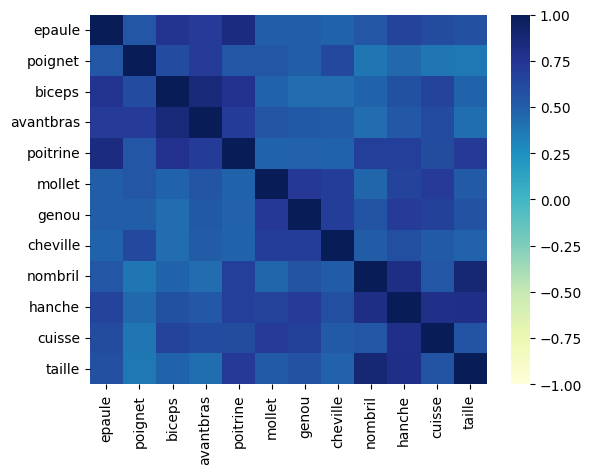

In [20]:
#corrélation et représentation
RSorted = XSorted.corr()
sns.heatmap(RSorted,vmin=-1.0,vmax=+1,cmap="YlGnBu")

# Situation de la variable poitrine (var. n°4)

In [21]:
#accès aux effectifs
nk[1]

array([5, 3, 4], dtype=int64)

In [22]:
#transformer la matrice des corrélation en numpy
RSortedN = RSorted.values

#corrélation moyenne de "poitrine" avec son groupe
print((numpy.sum(RSortedN[4,:5]**2)-1)/4)

0.5229899942919172


In [23]:
#corrélation moyenne avec le 2nd groupe
print(numpy.mean(RSortedN[4,5:8]**2))

0.22644601472438644


In [24]:
#corrélation moyenne avec le 3e groupe
print(numpy.mean(RSortedN[4,8:]**2))

0.4514008145064753


# Analyse de la variable illustrative poids

In [25]:
#carré de la corrélation de poids avec l'ensemble des variables
SqCorPoids = XSorted.corrwith(body.poids)**2
print(SqCorPoids)

epaule       0.583175
poignet      0.332102
biceps       0.473500
avantbras    0.473921
poitrine     0.630344
mollet       0.477261
genou        0.552862
cheville     0.404584
nombril      0.601515
hanche       0.769878
cuisse       0.596434
taille       0.648248
dtype: float64


In [26]:
#* moyenne cor^2 pour les groupes *
#premier groupe
print(numpy.mean(SqCorPoids.values[:5]))
#second groupe
print(numpy.mean(SqCorPoids.values[5:8]))
#troisieme groupe
print(numpy.mean(SqCorPoids.values[8:]))

0.49860835381479907
0.4782355278485666
0.654018557667224


# Analyse sur les corrélations partielles

In [27]:
#import math
import math

#matrice des corrélations - variables triées
corSortedP = XSorted.corr()

#correlations avec poids
corPoids = XSorted.corrwith(body.poids)

#matrice des corrélations partielles
for i in range(corSortedP.shape[0]):
    for j in range(corSortedP.shape[1]):
        corSortedP.iloc[i,j] = (corSortedP.iloc[i,j] - corPoids[i]*corPoids[j])
        corSortedP.iloc[i,j] = corSortedP.iloc[i,j]/(math.sqrt(1-corPoids[i]**2)*math.sqrt(1-corPoids[j]**2))
        if (i==j):
            corSortedP.iloc[i,j] = 1.0

#affichage
print(corSortedP)

             epaule   poignet    biceps  avantbras  poitrine    mollet  \
epaule     1.000000  0.190456  0.508618   0.379327  0.582384 -0.071660   
poignet    0.190456  1.000000  0.361382   0.525797  0.179008  0.238986   
biceps     0.508618  0.361382  1.000000   0.742843  0.524324 -0.001108   
avantbras  0.379327  0.525797  0.742843   1.000000  0.350424  0.149069   
poitrine   0.582384  0.179008  0.524324   0.350424  1.000000 -0.166572   
mollet    -0.071660  0.238986 -0.001108   0.149069 -0.166572  1.000000   
genou     -0.156874  0.125164 -0.171126   0.033078 -0.268732  0.440325   
cheville  -0.031231  0.415549 -0.018062   0.133762 -0.072062  0.458523   
nombril   -0.130436 -0.112071 -0.128814  -0.235216  0.180038 -0.159775   
hanche    -0.059161 -0.140694 -0.092167  -0.190516 -0.049174  0.137882   
cuisse     0.038460 -0.120722  0.284165   0.172060 -0.029515  0.372918   
taille    -0.088601 -0.196302 -0.193644  -0.310731  0.205702 -0.092596   

              genou  cheville   nombr

<AxesSubplot: >

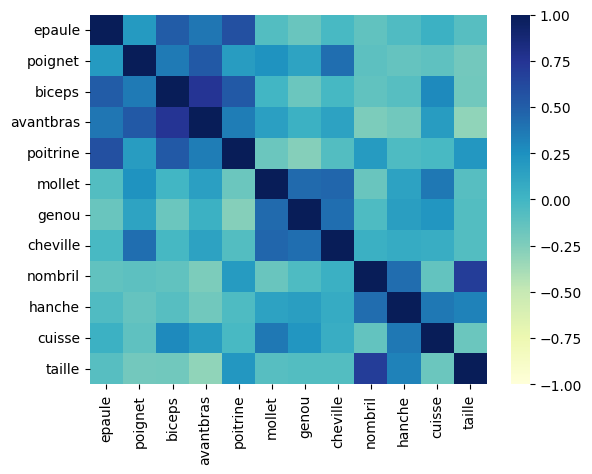

In [28]:
#heatmap
sns.heatmap(corSortedP,vmin=-1.0,vmax=+1.0,cmap="YlGnBu")

In [29]:
#valeurs et vecteurs propres
from numpy.linalg import eig
valp, vecp = eig(corSortedP)

#valeurs propres
print(valp)

[3.02233862 2.38492531 1.90415123 1.37801981 0.71988574 0.17993648
 0.24330797 0.26564649 0.31675104 0.44852969 0.57495542 0.56155218]


In [30]:
#somme totale des valp
print(numpy.sum(valp))

11.999999999999996


In [31]:
#information restituée sur les 2 premiers facteurs
print(numpy.sum(valp[:2])/XSorted.shape[1])

0.45060532788907076


In [32]:
#1er et 2e vecteurs propres
print(vecp[:,0:2])

[[ 0.35789288  0.238189  ]
 [ 0.34979655 -0.14545165]
 [ 0.47397981  0.1507569 ]
 [ 0.49270177 -0.01661847]
 [ 0.28526794  0.37032242]
 [ 0.1030372  -0.47727352]
 [-0.01715436 -0.47034159]
 [ 0.1057984  -0.39409734]
 [-0.24675583  0.19178264]
 [-0.17445999 -0.09558635]
 [ 0.11680187 -0.24787693]
 [-0.27146587  0.22423886]]


In [33]:
#corrélation des variables avec les axes
coordVar = vecp[:,0:2].copy()
coordVar[:,0] = coordVar[:,0] * math.sqrt(valp[0])
coordVar[:,1] = coordVar[:,1] * math.sqrt(valp[1])

#transformation en data frame avec les coordonnées des var.
coordVar = pandas.DataFrame(coordVar[:,0:2],columns=['F1','F2'],index=XSorted.columns)
print(coordVar)

                 F1        F2
epaule     0.622192  0.367840
poignet    0.608117 -0.224624
biceps     0.824008  0.232817
avantbras  0.856556 -0.025664
poitrine   0.495935  0.571896
mollet     0.179129 -0.737063
genou     -0.029823 -0.726358
cheville   0.183929 -0.608613
nombril   -0.428982  0.296174
hanche    -0.303297 -0.147616
cuisse     0.203059 -0.382801
taille    -0.471940  0.346297


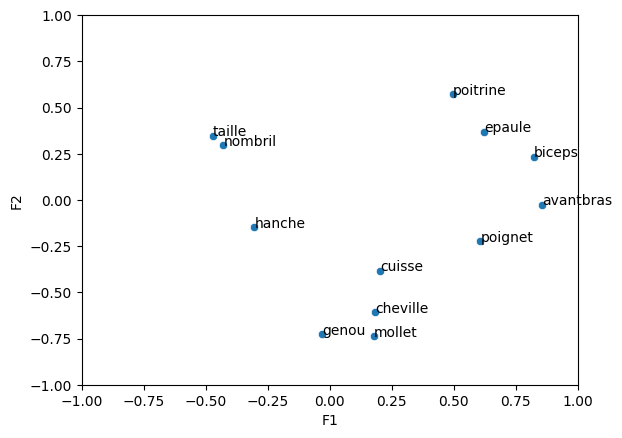

In [34]:
#dans le plan
ax = plt.axes(xlim=(-1,+1),ylim=(-1,+1))
sns.scatterplot(coordVar,x='F1',y='F2',ax=ax)
for i,v in enumerate(XSorted.columns):
    plt.annotate(v,(coordVar.iloc[i,0],coordVar.iloc[i,1]))
plt.show()

In [35]:
#identifiant de groupe
idGrp = numpy.concatenate((numpy.repeat('red',nk[1][0]),numpy.repeat('green',nk[1][1]),numpy.repeat('blue',nk[1][2])),axis=0)

#ajouter l'identifiant de groupe
coordVar['idGrp'] = idGrp
print(coordVar)

                 F1        F2  idGrp
epaule     0.622192  0.367840    red
poignet    0.608117 -0.224624    red
biceps     0.824008  0.232817    red
avantbras  0.856556 -0.025664    red
poitrine   0.495935  0.571896    red
mollet     0.179129 -0.737063  green
genou     -0.029823 -0.726358  green
cheville   0.183929 -0.608613  green
nombril   -0.428982  0.296174   blue
hanche    -0.303297 -0.147616   blue
cuisse     0.203059 -0.382801   blue
taille    -0.471940  0.346297   blue


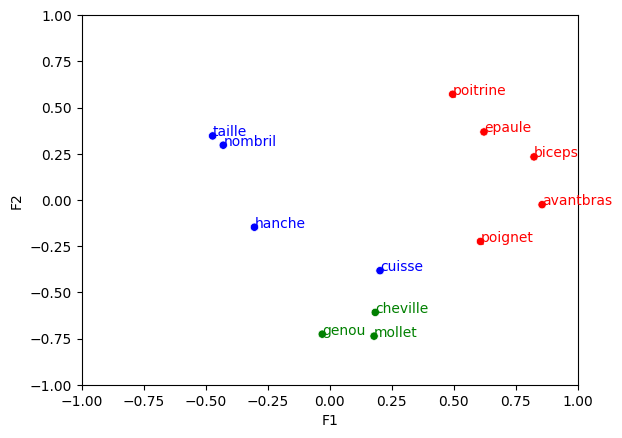

In [36]:
#graphique
ax = plt.axes(xlim=(-1,+1),ylim=(-1,+1))
sns.scatterplot(coordVar,x='F1',y='F2',hue='idGrp',palette=['red','green','blue'],legend=False,ax=ax)
for i,v in enumerate(XSorted.columns):
    plt.annotate(v,(coordVar.iloc[i,0],coordVar.iloc[i,1]),color=idGrp[i])
plt.show()